In [373]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


from astroduet.config import Telescope
from astroduet.image_utils import construct_image

from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [374]:
def rms(x):
    return np.sqrt((x.dot(x))/x.size)

In [375]:
duet = Telescope()

7.061859202425605


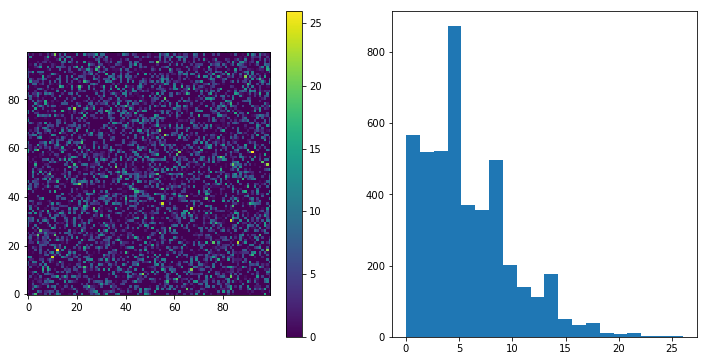

In [376]:
# Set the read_noise to be something rather hefty and turn off the dark current
duet.read_noise = 7
duet.dark_current = 0

frame=np.array([100, 100])
exposure = 300*u.s
sim_image = construct_image(frame, exposure, duet=duet)
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(sim_image.value, cmap='viridis', aspect=1, origin='lower')
plt.colorbar()
plt.subplot(122)
cts = np.reshape(sim_image.value, -1)
histvals =  plt.hist(cts[(cts>0)], range = [0, max(cts)], bins = 20)

# Recover a 3 e- RMS read noise when you discount cts=0 values.
print( (rms(cts[(cts>0)])) )
